<a href="https://colab.research.google.com/github/cmcin019/mini-cours/blob/jour-4/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

# **Tutoriel PyTorch**

In [1]:
from __future__ import print_function
import pickle as pkl
import torch
import numpy as np
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

# Tensors

* C'est comme un ndarray numpy
* Ne sait rien de l'apprentissage profond, des graphes de calcul ou des gradients.
* **Il fonctionne aussi sur GPU !**
* Peut convertir dans les deux sens à partir d'un tableau numpy

In [2]:
x = torch.Tensor(3, 4)
print(x)

tensor([[1.9029e+31, 1.8583e+28, 1.2277e-14, 3.0262e+29],
        [1.5937e-10, 5.6267e-11, 4.6180e+24, 5.3984e+28],
        [2.1714e+29, 8.1563e-33, 3.6013e-42, 4.5112e-41]])


Nous venons de déclarer un tenseur non initialisé. Les données qu'il contient sont des déchets, ce ne sont que des éléments aléatoires qui se trouvaient dans la mémoire.

In [3]:
#View the shape of a tensor
x.size()

torch.Size([3, 4])

In [4]:
#Declaring a random tensor of shape (2,3)
x = torch.rand(2, 3)
print(x)

tensor([[0.8977, 0.4991, 0.2846],
        [0.7136, 0.5751, 0.9451]])


In [5]:
#Declaring a custom tensor
#What's inside can be any python list or numpy array

x = torch.Tensor(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6]
    ]
)
x

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

In [6]:
#Declaring an empty tensor and a tensor filled with 1s
zeros = torch.zeros(2,3)
print(zeros)

print()

ones = torch.ones(2,3)
print(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
#Changing elements of tensor
print(x)

x[1][1] = 24

print(x)

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])
tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])


In [8]:
#Numpy indexing
#if we only want the second column
print(x)

print(x[:, 1])

tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])
tensor([ 0.2000, 24.0000])


In [9]:
#Reshaping
print(x)
print()
print(x.view(3,2))
print()

print(x.view(3,-1))
print()
#Give me 3 rows, you figure out the appropriate number of colomns.
#Only one of the axis value can be -1

tensor([[ 0.1000,  0.2000,  0.3000],
        [ 0.4000, 24.0000,  0.6000]])

tensor([[ 0.1000,  0.2000],
        [ 0.3000,  0.4000],
        [24.0000,  0.6000]])

tensor([[ 0.1000,  0.2000],
        [ 0.3000,  0.4000],
        [24.0000,  0.6000]])



### Les tensors supportent la plupart des opérations numpy comme la diffusion, l'arithmétique, le remodelage, l'indexation, etc.

In [10]:
x = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

y = torch.Tensor([[2]*3]*2)

print(f"x :\n{x}\n")
print(f"y :\n{y}")

x :
tensor([[1., 2., 3.],
        [4., 5., 6.]])

y :
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [11]:
x + y

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [12]:
x * y

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [13]:
x * 2

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [14]:
#Broadcasting
print(f"x :\n{x}\n")


z = torch.tensor([3.0 ,4.0]).view(-1,1)
print(f"z :\n{z}\n")

print(f"x * z :\n{x * z}\n")

x :
tensor([[1., 2., 3.],
        [4., 5., 6.]])

z :
tensor([[3.],
        [4.]])

x * z :
tensor([[ 3.,  6.,  9.],
        [16., 20., 24.]])



In [15]:
# move tensor to GPU using
x = x.cuda()
print(x)


# move back to CPU
x = x.cpu()
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


###Autograd

Les tensors peuvent être initialisés avec un argument supplémentaire qui leur permet d'utiliser autograd.

Autograd suit les gradients pour chaque calcul d'un tensor.

Certains anciens tutoriels PyTorch utilisent Variable pour envelopper un tenseur afin d'utiliser autograd.

In [16]:
x = torch.tensor([2.0], requires_grad=True)
x


tensor([2.], requires_grad=True)

In [17]:
# x^3 = 9
output = x.pow(3)
output

tensor([8.], grad_fn=<PowBackward0>)

In [18]:
#Calling backward computes the derivative of whatever was calculated
output.backward()

In [19]:
#We can call tensor.grad to see the computed gradient.
#Example here, d/dx (x^3) = 3x^2, which is 3 * 2^2 = 12
x.grad

tensor([12.])

In [20]:
#Only Floating point tensors can use autograd
x = torch.tensor(
    [
        [1,2,3],
        [4,5,6]
    ]
,requires_grad = True
)

x + 3

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

### Exemple plus élaboré de suivi de gradient

In [21]:
#We declare two tensors, a and b
a = torch.tensor(
    [
        [1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0]
    ]
,requires_grad = True
)
a

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [22]:
b = torch.tensor(
    [
        [2.0, 2.0],
        [2.0, 2.0],
        [2.0, 2.0]
    ]
,requires_grad = True
)
b

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], requires_grad=True)

In [23]:
# We perform a matrix multiplication of a and b
c = a.matmul(b)
c

tensor([[6., 6.],
        [6., 6.]], grad_fn=<MmBackward0>)

In [24]:
#We then multiply again, and perform a broadcast addition
d = (c.pow(2) + 5)
d

tensor([[41., 41.],
        [41., 41.]], grad_fn=<AddBackward0>)

In [25]:
# Take a mean
e = d.mean()
e

tensor(41., grad_fn=<MeanBackward0>)

In [26]:
#Compute gradients
e.backward()

In [27]:
print(a.grad)
print(b.grad)
#print(d.grad)
#print(c.grad)

tensor([[12., 12., 12.],
        [12., 12., 12.]])
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]])


### Les gradients sont accumulés

In [28]:
a = torch.eye(1, requires_grad=True)

b = a**2
c = a**3

print(f"a : {a}")
print(f"b : {b}")
print(f"c : {c}")

a : tensor([[1.]], requires_grad=True)
b : tensor([[1.]], grad_fn=<PowBackward0>)
c : tensor([[1.]], grad_fn=<PowBackward0>)


In [29]:
# Compute gradient after b, we get d/dx x^2 = 2x = 2
b.backward()
a.grad

tensor([[2.]])

In [30]:
# Compute gradient after c, we get d/dx x^3 = 3x^2 = 3
# a's gradient term will not be 3, because gradient accumulates. 2 + 3 = 5
c.backward()
a.grad

tensor([[5.]])

# Graphes de calcul dynamique

* PyTorch maintient un graphe qui enregistre toutes les opérations effectuées sur les variables au fur et à mesure que vous exécutez vos opérations.
* Il en résulte un graphe acyclique dirigé dont les feuilles sont les variables d'entrée et les racines les variables de sortie.
* En traçant ce graphe des racines aux feuilles, vous pouvez calculer automatiquement les gradients à l'aide de la règle de la chaîne.

![alt text](https://media.giphy.com/media/28g130aXBImNlG3dhG/giphy.gif)


## Modules

* Objets différentiables ; peuvent stocker des états ou des poids pouvant être appris.
* Peut définir un nouveau module ; il entre et sort des tenseurs et des fonctions d'entrée et de sortie correspondantes.


### torch.nn

Les réseaux neuronaux peuvent être construits à l'aide du paquet **torch.nn**.

* Couches linéaires - nn.Linear, nn.Bilinear
* Couches de convolution - nn.Conv1d, nn.Conv2d, nn.Conv3d, nn.ConvTranspose2d
* Non-linéarités - nn.Sigmoïde, nn.Tanh, nn.ReLU, nn.LeakyReLU
* Couches de mise en commun - nn.MaxPool1d, nn.AveragePool2d
* Réseaux récurrents - nn.LSTM, nn.GRU
* Normalisation - nn.BatchNorm2d
* Dropout - nn.Dropout, nn.Dropout2d
* Embedding - nn.Embedding
* Fonctions de perte - nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss


In [31]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.

        Args:
            - D_in : input dimension of the data
            - H : size of the first hidden layer
            - D_out : size of the output/ second layer
        """
        super(TwoLayerNet, self).__init__() # intialize recursively
        self.linear1 = torch.nn.Linear(D_in, H) # create a linear layer
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and
        return a tensor of output data. We can use
        Modules defined in the constructor as well as arbitrary
        operators on Variables.
        """
        h_relu = self.linear1(x)
        y_pred = self.linear2(h_relu)
        return y_pred


In [32]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.

N, D_in, H, D_out = 64, 1000, 100, 10

In [33]:
# Create random Tensors to hold inputs and outputs

x = torch.randn(N, D_in)
y = torch.randn(N, D_out, requires_grad=False)


In [34]:
# Construct our model by instantiating the class defined above

model = TwoLayerNet(D_in, H, D_out)


**### Construire notre fonction d'erreur et un optimiseur. **

L'appel à **model.parameters()** dans le constructeur SGD contiendra les paramètres apprenables des deux modules nn.Linear qui font partie du modèle.

In [35]:
# loss function
criterion = torch.nn.MSELoss(reduction='sum')

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [36]:
losses = []

for epoch in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    losses.append(loss.data.item())
    print(f"Epoch : {epoch}    Loss : {loss.data.item()}")

    # Reset gradients to zero, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch : 0    Loss : 715.6911010742188
Epoch : 1    Loss : 612.7010498046875
Epoch : 2    Loss : 527.4591674804688
Epoch : 3    Loss : 455.6404724121094
Epoch : 4    Loss : 394.3492736816406
Epoch : 5    Loss : 341.5675964355469
Epoch : 6    Loss : 295.83636474609375
Epoch : 7    Loss : 256.0631103515625
Epoch : 8    Loss : 221.40130615234375
Epoch : 9    Loss : 191.17369079589844
Epoch : 10    Loss : 164.8223114013672
Epoch : 11    Loss : 141.87554931640625
Epoch : 12    Loss : 121.92647552490234
Epoch : 13    Loss : 104.61839294433594
Epoch : 14    Loss : 89.63520812988281
Epoch : 15    Loss : 76.69497680664062
Epoch : 16    Loss : 65.54540252685547
Epoch : 17    Loss : 55.96068572998047
Epoch : 18    Loss : 47.738990783691406
Epoch : 19    Loss : 40.70057678222656
Epoch : 20    Loss : 34.68598937988281
Epoch : 21    Loss : 29.55436897277832
Epoch : 22    Loss : 25.18195152282715
Epoch : 23    Loss : 21.460493087768555
Epoch : 24    Loss : 18.295757293701172
Epoch : 25    Loss : 15.60

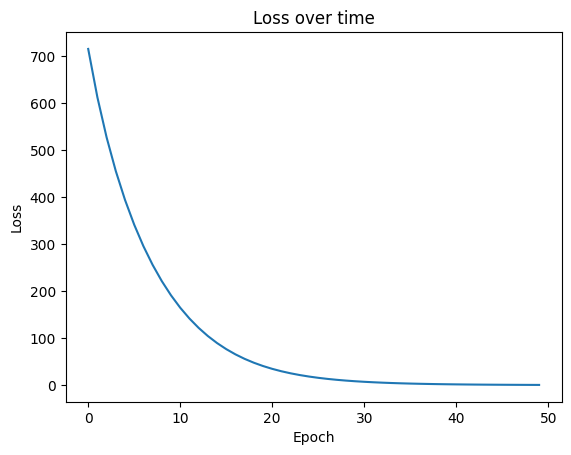

In [37]:
import matplotlib.pyplot as plt
plt.title('Loss over time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses)

In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:06<00:00, 27639629.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Exemple de classificateur

Nous devons d'abord définir la structure du modèle et le processus de passage en avant

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
print(Net())

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


Nous pouvons utiliser CUDA pour accélérer la formation.

In [40]:
net=Net()
CUDA=torch.cuda.is_available()
if CUDA:
  net=net.cuda()

# Let's first define our device as the first visible cuda device if we have
# CUDA available:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

#In Colab, got to Edit>Notebook settings> choose Python 3. For the hardware
#accelerator, you may select None or GPU.

cuda:0


La formation du modèle peut prendre un certain temps. Cela peut prendre plusieurs minutes, surveillez les époques imprimées ci-dessous. La précision d'apprentissage du modèle est imprimée avec les itérations.

In [41]:
# Train the network
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
accuracy_values=[]
epoch_number=[]
for epoch in range(10):  # loop over the dataset multiple times. Here 10 means 10 epochs
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if CUDA:
          inputs = inputs.cuda()
          labels = labels.cuda()
        else:
          inputs = inputs.cpu()
          labels = labels.cpu()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[epoch%d, itr%5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
              images = images.cuda()
              labels = labels.cuda()
            else:
              images = images.cpu()
              labels =labels.cpu()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
              correct += (predicted==labels).sum().item()

        TestAccuracy = 100 * correct / total;
        epoch_number += [epoch+1]
        accuracy_values += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' %
                  (epoch + 1, TestAccuracy))

print('Finished Training')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[epoch1, itr 2000] loss: 2.241
[epoch1, itr 4000] loss: 1.888
[epoch1, itr 6000] loss: 1.701
[epoch1, itr 8000] loss: 1.579
[epoch1, itr10000] loss: 1.513
[epoch1, itr12000] loss: 1.457
Epoch=1 Test Accuracy=50.180
[epoch2, itr 2000] loss: 1.385
[epoch2, itr 4000] loss: 1.360
[epoch2, itr 6000] loss: 1.353
[epoch2, itr 8000] loss: 1.312
[epoch2, itr10000] loss: 1.284
[epoch2, itr12000] loss: 1.288
Epoch=2 Test Accuracy=51.000
[epoch3, itr 2000] loss: 1.194
[epoch3, itr 4000] loss: 1.206
[epoch3, itr 6000] loss: 1.202
[epoch3, itr 8000] loss: 1.167
[epoch3, itr10000] loss: 1.168
[epoch3, itr12000] loss: 1.155
Epoch=3 Test Accuracy=58.020
[epoch4, itr 2000] loss: 1.065
[epoch4, itr 4000] loss: 1.088
[epoch4, itr 6000] loss: 1.090
[epoch4, itr 8000] loss: 1.073
[epoch4, itr10000] loss: 1.077
[epoch4, itr12000] loss: 1.069
Epoch=4 Test Accuracy=60.830
[epoch5, itr 2000] loss: 0.993
[epoch5, itr 4000] loss: 1.015
[epoch5, itr 6000] loss: 1.006
[epoch5, itr 8000] loss: 1.009
[epoch5, itr1000

Voyons quelques résultats

[50.18, 51.0, 58.02, 60.83, 60.59, 62.18, 63.07, 62.39, 63.41, 62.94]


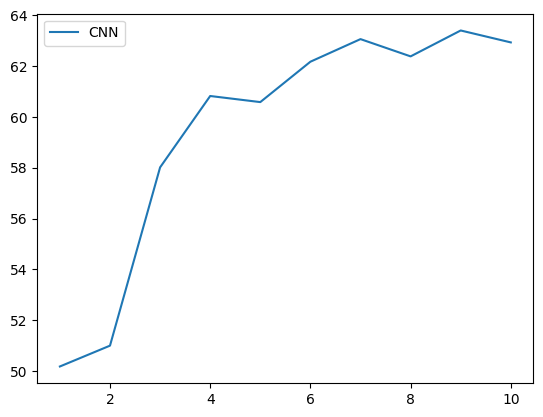

In [42]:

print(accuracy_values)
# Plot the data
plt.plot(epoch_number, accuracy_values, label='CNN')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

#Code additionnel pour explorer le jeu de données et le modèle formé

torch.Size([4, 3, 32, 32])


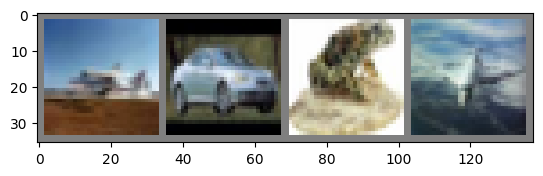

plane   car  frog plane


In [43]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

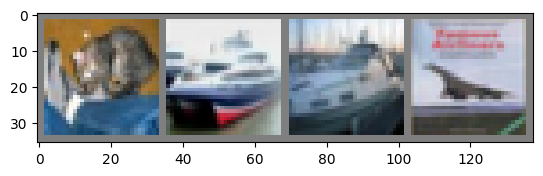

GroundTruth:    cat  ship  ship plane
Predicted:    cat plane   car plane


In [44]:
# Test the network on some test images

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
if CUDA:
  images = images.cuda()
  labels = labels.cuda()
else:
  images = images.cpu()
  labels =labels.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [45]:
# Lets check what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        if CUDA:
          images =images.cuda()
          labels =labels.cuda()
        else:
          images =images.cpu()
          labels =labels.cpu()

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 82 %
Accuracy of  bird : 53 %
Accuracy of   cat : 51 %
Accuracy of  deer : 54 %
Accuracy of   dog : 48 %
Accuracy of  frog : 63 %
Accuracy of horse : 67 %
Accuracy of  ship : 63 %
Accuracy of truck : 76 %


# Démonstration de segmentation sémantique


### Configuration de l'environnement

Tout d'abord, télécharger le code et les modèles pré-entraînés si nous sommes sur colab.

In [46]:
%%bash
# Colab-specific setup
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
pip install yacs 2>&1 >> install.log
git init 2>&1 >> install.log
git remote add origin https://github.com/CSAILVision/semantic-segmentation-pytorch.git 2>> install.log
git pull origin master 2>&1 >> install.log
DOWNLOAD_ONLY=1 ./demo_test.sh 2>> install.log

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
From https://github.com/CSAILVision/semantic-segmentation-pytorch
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master


## Importations et fonctions utilitaires

Nous avons besoin de pytorch, numpy, et du code pour le modèle de segmentation.  Et quelques utilitaires pour visualiser les données.

In [47]:
# System libs
import os, csv, torch, numpy, scipy.io, PIL.Image, torchvision.transforms
# Our libs
from mit_semseg.models import ModelBuilder, SegmentationModule
from mit_semseg.utils import colorEncode

colors = scipy.io.loadmat('data/color150.mat')['colors']
names = {}
with open('data/object150_info.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[5].split(";")[0]

def visualize_result(img, pred, index=None):
    # filter prediction class if requested
    if index is not None:
        pred = pred.copy()
        pred[pred != index] = -1
        print(f'{names[index+1]}:')

    # colorize prediction
    pred_color = colorEncode(pred, colors).astype(numpy.uint8)

    # aggregate images and save
    im_vis = numpy.concatenate((img, pred_color), axis=1)
    display(PIL.Image.fromarray(im_vis))

## Chargement du modèle de segmentation

Nous chargeons ici un modèle de segmentation pré-entraîné.  Comme tout modèle pytorch, nous pouvons l'appeler comme une fonction, ou examiner les paramètres dans toutes les couches.

In [48]:
# Network Builders
net_encoder = ModelBuilder.build_encoder(
    arch='resnet50dilated',
    fc_dim=2048,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth')
net_decoder = ModelBuilder.build_decoder(
    arch='ppm_deepsup',
    fc_dim=2048,
    num_class=150,
    weights='ckpt/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth',
    use_softmax=True)

crit = torch.nn.NLLLoss(ignore_index=-1)
segmentation_module = SegmentationModule(net_encoder, net_decoder, crit)
segmentation_module.eval()
segmentation_module.cuda()

Loading weights for net_encoder
Loading weights for net_decoder


SegmentationModule(
  (encoder): ResnetDilated(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): SynchronizedBatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): SynchronizedBatchNorm2d(128, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): SynchronizedBatchNorm2d(64, eps=1

### Charger les données de test

Nous allons maintenant charger et normaliser une seule image de test.  Nous utilisons ici la convention courante qui consiste à normaliser l'image à une échelle pour laquelle les valeurs RVB d'un grand ensemble de données photographiques auraient une moyenne nulle et un écart-type unitaire (ces chiffres proviennent de l'ensemble de données imagenet).  (Ces chiffres proviennent de l'ensemble de données imagenet.) Avec cette normalisation, les plages limites des valeurs RVB sont comprises entre -2,2 et +2,7.

In [49]:
# Load and normalize one image as a singleton tensor batch
pil_to_tensor = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # These are RGB mean+std values
        std=[0.229, 0.224, 0.225])  # across a large photo dataset.
])
pil_image = PIL.Image.open('ADE_val_00001519.jpg').convert('RGB')
img_original = numpy.array(pil_image)
img_data = pil_to_tensor(pil_image)
singleton_batch = {'img_data': img_data[None].cuda()}
output_size = img_data.shape[1:]

## Exécuter le modèle

Enfin, nous passons l'image de test au modèle de segmentation.

Le modèle de segmentation est codé comme une fonction qui prend un dictionnaire en entrée, parce qu'il veut connaître à la fois les données de l'image de lot en entrée et la résolution de segmentation souhaitée en sortie.  Nous demandons une résolution complète en sortie.

Nous utilisons ensuite la fonction visualize_result définie précédemment pour rendre la carte de segmentation.

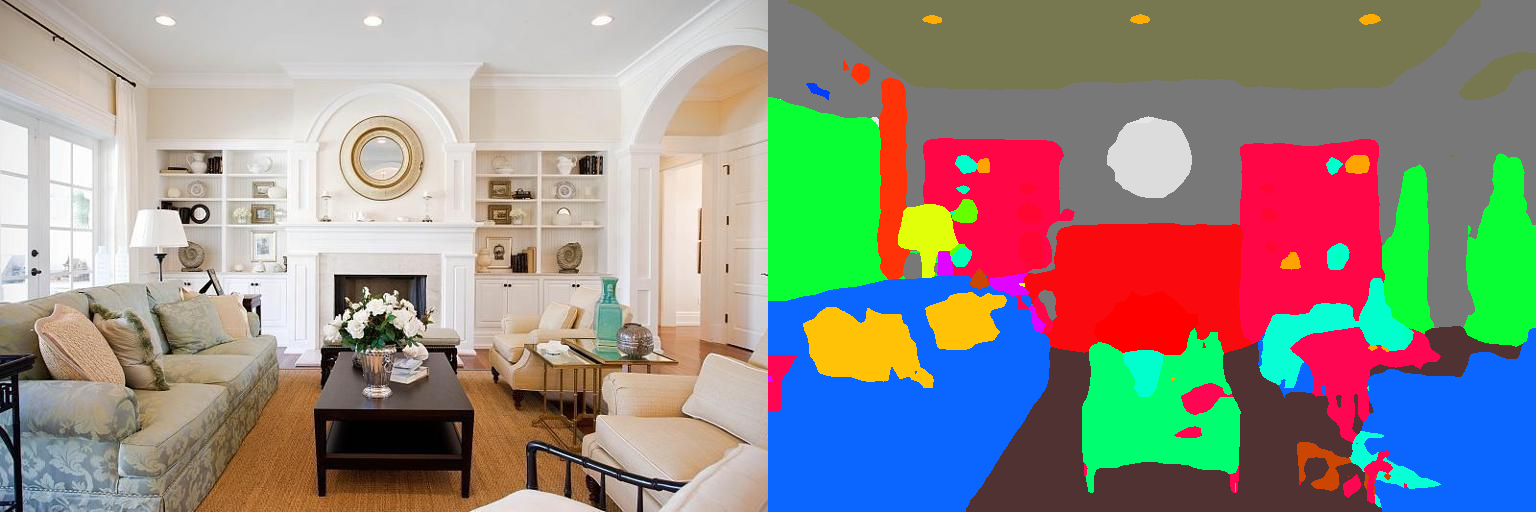

In [50]:
# Run the segmentation at the highest resolution.
with torch.no_grad():
    scores = segmentation_module(singleton_batch, segSize=output_size)

# Get the predicted scores for each pixel
_, pred = torch.max(scores, dim=1)
pred = pred.cpu()[0].numpy()
visualize_result(img_original, pred)

# Hugging Face

In [52]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted class: Egyptian cat


# MediaPipe

In [53]:
if 'google.colab' in str(get_ipython()):
    !pip install opencv-python
    !pip install mediapipe
    !wget https://raw.githubusercontent.com/spmallick/learnopencv/blob/master/Introduction-to-MediaPipe/person-full-body.jpg
    !wget https://raw.githubusercontent.com/spmallick/learnopencv/master/Introduction-to-MediaPipe/hand.jpg
else:
    pass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [54]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

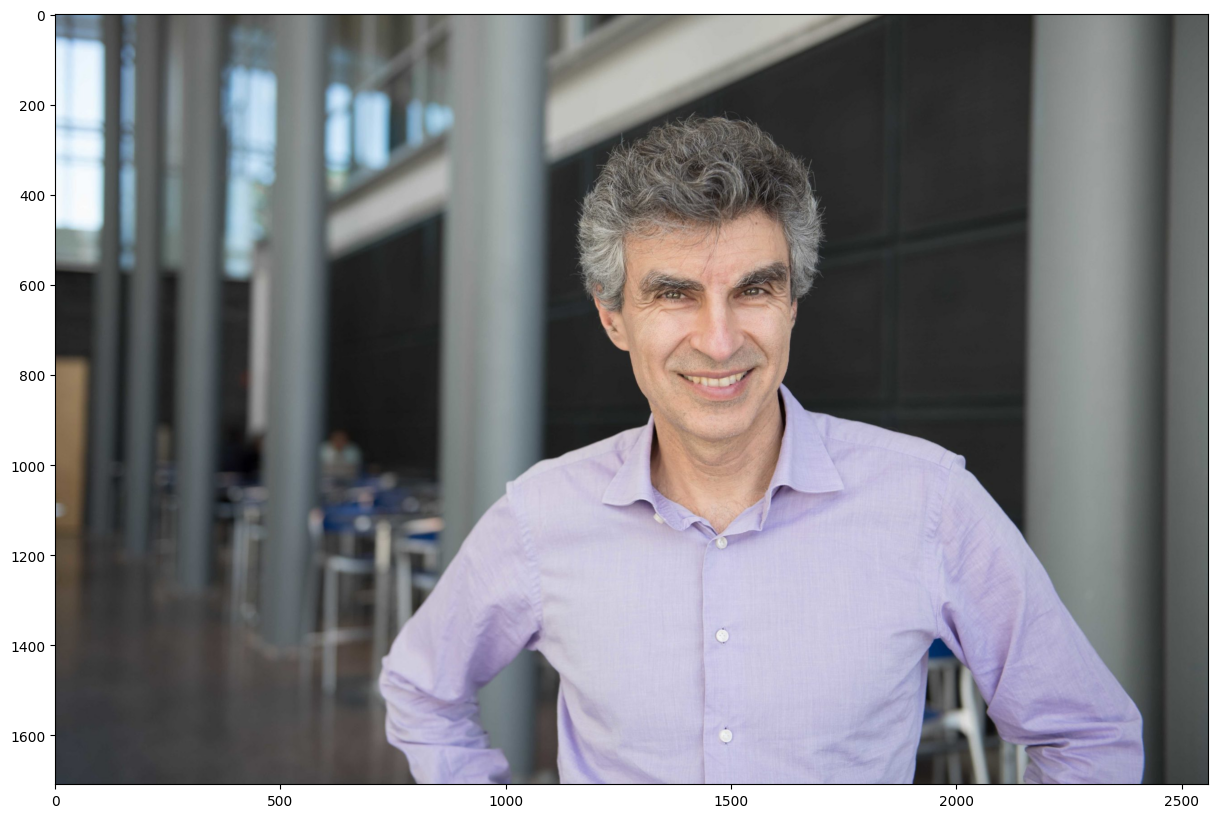

In [57]:
img = cv2.imread('yoshua.jpg')
plt.figure(figsize=(15,10))
plt.imshow(img[...,::-1]);

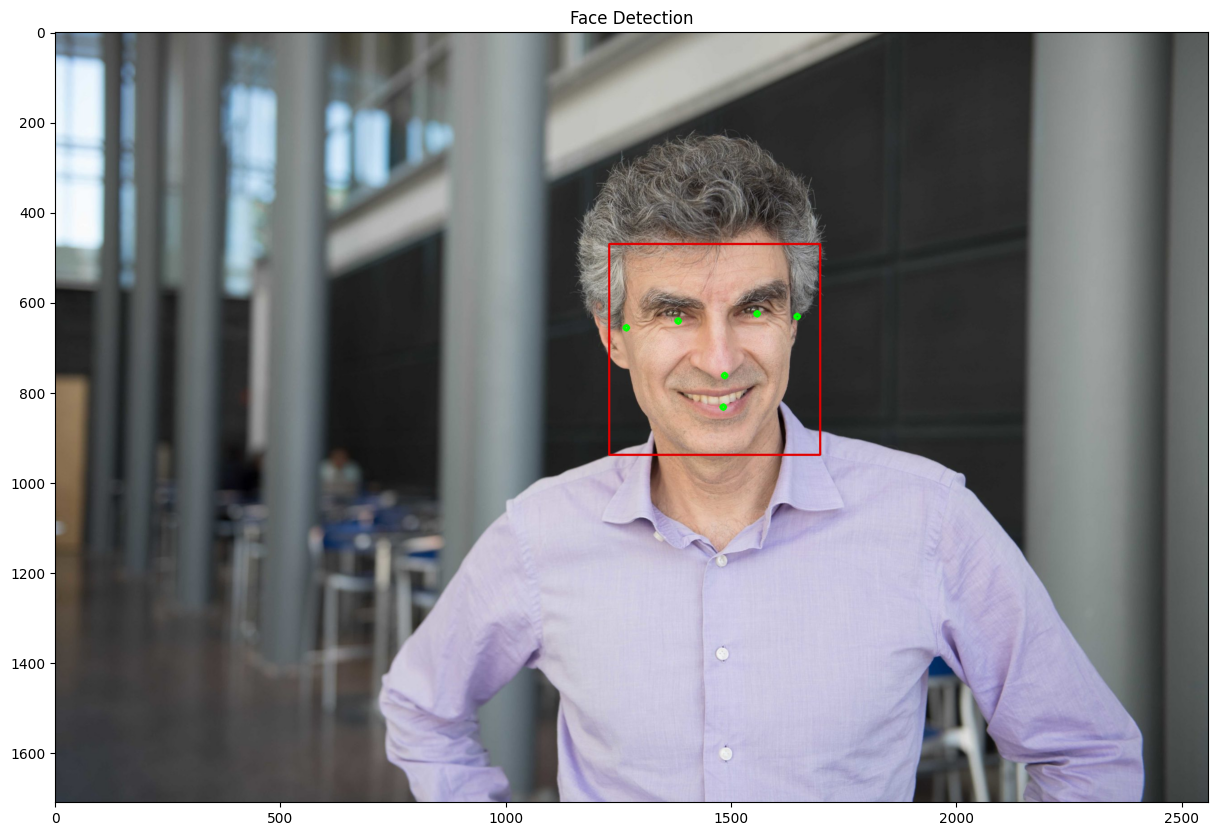

In [63]:
# Initialize face detection solution and drawing utility.
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Convert the BGR image to RGB.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process it with MediaPipe Face Detection.
results = face_detection.process(rgb_img)
# print(results.detections)

# Draw face detection.
annotated_img = img.copy()

for detection in results.detections:
    mp_drawing.draw_detection(annotated_img,
                              detection,
                              keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=5),
                              bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 225), thickness=3, circle_radius=3))

# Display.
plt.figure(figsize=(15,10))
plt.imshow(annotated_img[...,::-1])
plt.title("Face Detection");

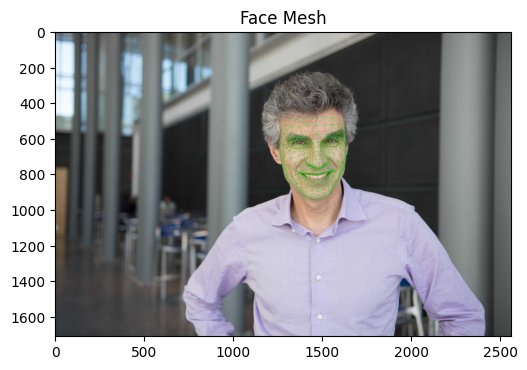

In [65]:
# Initialize face mesh and drawing styles.
mp_face_mesh = mp.solutions.face_mesh
mp_drawing_styles = mp.solutions.drawing_styles

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True,
                                  max_num_faces=1,
                                  refine_landmarks=True,
                                  min_detection_confidence=0.5)


# Convert the BGR image to RGB before processing.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb_img)

# Draw face mesh landmarks on the image.
img_mesh = img.copy()
img_contours = img.copy()
img_iris = img.copy()


for face_landmarks in results.multi_face_landmarks:
    # Mesh.
    mp_drawing.draw_landmarks(img_mesh,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_TESSELATION,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 0), thickness=1, circle_radius=1))
    # Contours.
    mp_drawing.draw_landmarks(img_contours,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_CONTOURS,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
    # Iris.
    mp_drawing.draw_landmarks(img_iris,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_IRISES,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

# Display the cropped region (700,0 and 1350,500).
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img_mesh[...,::-1])
plt.title('Face Mesh');


## Exercices

**Exercice 1.** Expérimenter différents paramètres de réseau. Utilisez la documentation de PyTorch pour utiliser différents composants du réseau.

**Exercice 2.** Explorer d'autres modèles de visages qui s'enlacent et essayer de les utiliser en collaboration. Utilisez ces modèles pour effectuer des tâches sur des images que vous trouvez et que vous importez dans colab.

**Exercice 3.** Explorer l'api mediapipe. Implémentez un pipeline capable de prendre une vidéo et d'effectuer une transformation de votre choix.

## Aller plus loin

Documentation Pytorch
https://pytorch.org/docs/stable/index.html

Hugging face https://huggingface.co/

Mediapipe https://developers.google.com/mediapipe/api/solutions

## À noter

Ce carnet est inspiré et s'inspire du référentiel suivant
https://colab.research.google.com/github/CSAILVision/semantic-segmentation-pytorch/blob/master/notebooks/DemoSegmenter.ipynb#scrollTo=Risbl0-Moli7